In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import datetime as dt
import seaborn as sns
import ipywidgets as widgets
import plotly.express as px

In [68]:
# Read file excel by pandas
df=pd.read_excel("C:/Users/Admin/Downloads/Global_Superstore.xls")
# Drop'Row ID', 'Postal Code'
df.drop(columns=['Row ID', 'Postal Code'], inplace=True)
# Check NaN   
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65535 entries, 0 to 65534
Data columns (total 22 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Order ID        65535 non-null  object        
 1   Order Date      65535 non-null  datetime64[ns]
 2   Ship Date       65535 non-null  datetime64[ns]
 3   Ship Mode       65535 non-null  object        
 4   Customer ID     65535 non-null  object        
 5   Customer Name   65535 non-null  object        
 6   Segment         65535 non-null  object        
 7   City            65535 non-null  object        
 8   State           65535 non-null  object        
 9   Country         65535 non-null  object        
 10  Region          65535 non-null  object        
 11  Market          65535 non-null  object        
 12  Product ID      65535 non-null  object        
 13  Product Name    65535 non-null  object        
 14  Sub-Category    65535 non-null  object        
 15  Ca

In [69]:
df.shape

(65535, 22)

## Define the trend line of business


In [70]:
#Add Month column
df["Month"]=df["Order Date"].dt.month.astype(np.uint8)
#Add Year column
df["Year"]=df["Order Date"].dt.year.astype(int)

In [71]:
#Creating a DataFrame that show number of orders by 2014,2015,2016,2017
month_2014=pd.DataFrame(df[df["Year"]==2014].groupby("Month").count()["Sales"])
month_2015=pd.DataFrame(df[df["Year"]==2015].groupby("Month").count()["Sales"])
month_2016=pd.DataFrame(df[df["Year"]==2016].groupby("Month").count()["Sales"])
month_2017=pd.DataFrame(df[df["Year"]==2017].groupby("Month").count()["Sales"])

#concat  DataFrame and change name
month_4=pd.concat([month_2014,month_2015,month_2016,month_2017],axis=1)
month_4.columns=["201" + str(i) for i in range(4,8)]
month_4

,2014,2015,2016,2017
Month,,,,
1,524,719,928,1176
2,561,540,794,977
3,612,835,1003,1366
4,684,841,987,1356
5,750,1087,1403,1685
6,1165,1469,1950,2283
7,654,812,1175,1360
8,1067,1408,1850,2140
9,1300,1563,2129,2526


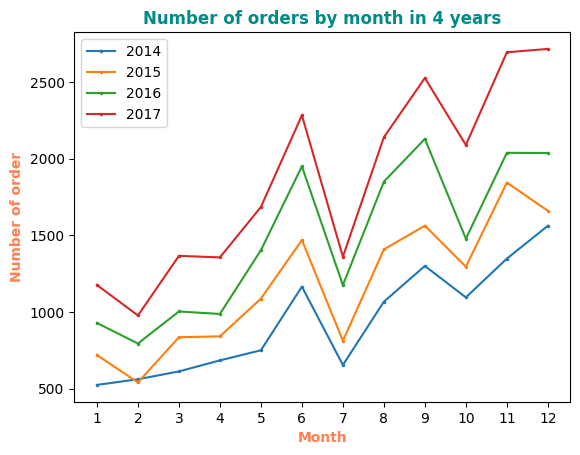

In [72]:
# Line chart
ax=month_4.plot.line(marker="o",markersize=1.5)
ax.set_xticks(range(1,13),[ str(i) for i in month_4.index.values],rotation=0)
ax.set_xlabel("Month",fontweight="bold",color="coral")
ax.set_title("Number of orders by month in 4 years",fontweight="bold",color="darkcyan")
ax.set_ylabel("Number of order",fontweight="bold",color="coral")
plt.show()

## Do shipping cost, shipping time and category cost affect number of orders?


### Shipping cost factor?


In [73]:
# Shippingcost mean per year 
shippingcost_yearly=df[["Shipping Cost","Year"]].groupby(["Year"]).mean().reset_index()
shippingcost_yearly

,Year,Shipping Cost
0,2014,28.089586
1,2015,26.500674
2,2016,27.426378
3,2017,26.992082


In [74]:
# Number of orders per year
order_yearly=df[["Year","Sales"]].groupby("Year").count().reset_index()
order_yearly

,Year,Sales
0,2014,11322
1,2015,14073
2,2016,17772
3,2017,22368


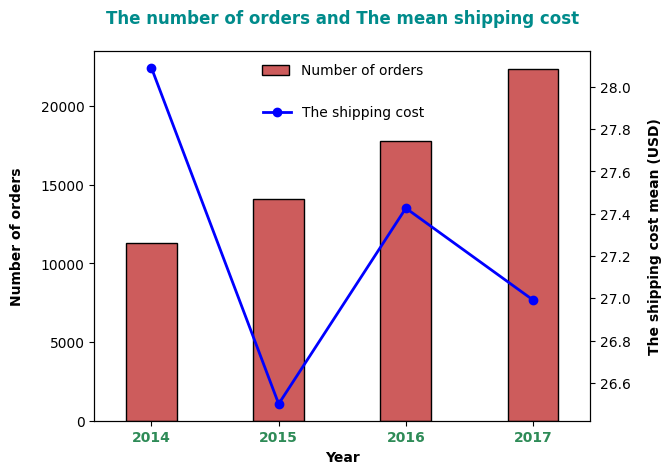

In [75]:
# Bar chart  
ax1=order_yearly.plot.bar(y="Sales",width=0.4,legend=None,color="indianred",edgecolor="black",linewidth=1)
ax1.set_xticklabels(order_yearly["Year"],fontweight="bold",color="seagreen",rotation=0)
ax1.set_xlabel("Year",fontweight="bold",fontsize=10)
ax1.set_ylabel("Number of orders",fontweight="bold",fontsize=10,labelpad=12)
ax1.legend(labels=["Number of orders"],frameon=False,loc="upper center")
ax1.set_title("The number of orders and The mean shipping cost",fontweight="bold",pad=20, color='darkcyan')

# twinx() 
ax2=ax1.twinx()
shippingcost_yearly.plot.line(ax=ax2, y="Shipping Cost", color='blue', linewidth=2,marker="o")
ax2.set_ylabel('The shipping cost mean (USD)', labelpad=12, fontsize=10, fontweight='bold')
ax2.legend(labels=['The shipping cost'],loc=(0.33,0.8),frameon=False)
plt.show()
plt.close("all")


### Delivery time factor?

In [76]:
# Add Delivery_Date = ship date - order date
df["Delivery_date"]=df["Ship Date"]-df["Order Date"]
# Convert to type: int 
df["Delivery_date"]=df["Delivery_date"].dt.days.astype(np.uint8)
df["Delivery_date"]

0        7
1        3
2        7
3        7
4        3
        ..
65530    6
65531    5
65532    6
65533    5
65534    4
Name: Delivery_date, Length: 65535, dtype: uint8

In [77]:
#groupby year & calculate mean() per year
shippingtime_yearly=df.groupby("Year").mean()["Delivery_date"].reset_index()
shippingtime_yearly

,Year,Delivery_date
0,2014,3.952747
1,2015,3.990834
2,2016,3.976705
3,2017,3.948364


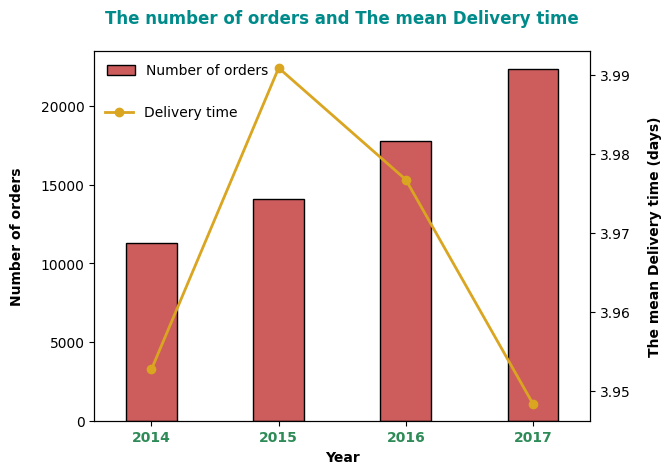

In [78]:
#Bar chart
ax1=order_yearly.plot.bar(y="Sales",width=0.4,legend=None,color="indianred",edgecolor="black",linewidth=1)
ax1.set_xticklabels(order_yearly["Year"],fontweight="bold",color="seagreen",rotation=0)
ax1.set_xlabel("Year",fontweight="bold",fontsize=10)
ax1.set_ylabel("Number of orders",fontweight="bold",fontsize=10,labelpad=12)
ax1.legend(labels=["Number of orders"],frameon=False,loc="upper left")
ax1.set_title("The number of orders and The mean Delivery time",fontweight="bold",pad=20, color='darkcyan')

#twinx
ax3=ax1.twinx()
shippingtime_yearly.plot.line(ax=ax3, y=["Delivery_date"], color='goldenrod', linewidth=2,marker="o")
ax3.set_ylabel('The mean Delivery time (days)', labelpad=12, fontsize=10, fontweight='bold')
ax3.legend(labels=['Delivery time'],loc=(0.01,0.8),frameon=False)
plt.show()

### Category cost by year

In [79]:
#Create Cost column
df["Cost"]=(df["Sales"]-df["Profit"])/df["Quantity"]

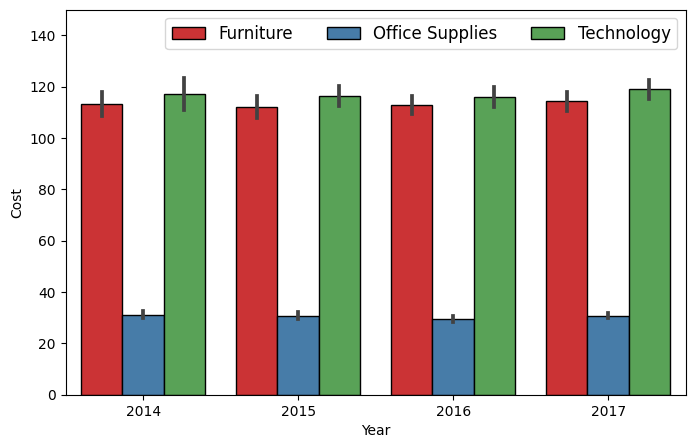

In [80]:
fig2=plt.figure(figsize=(8,5))
ax7=sns.barplot(x=df["Year"], y = df["Cost"],hue=df["Category"],palette="Set1",edgecolor="k")
ax7.legend(ncol=3,fontsize=12)
ax7.set_ylim([0,150])
plt.show()

## Correlative between Profit & Sales 

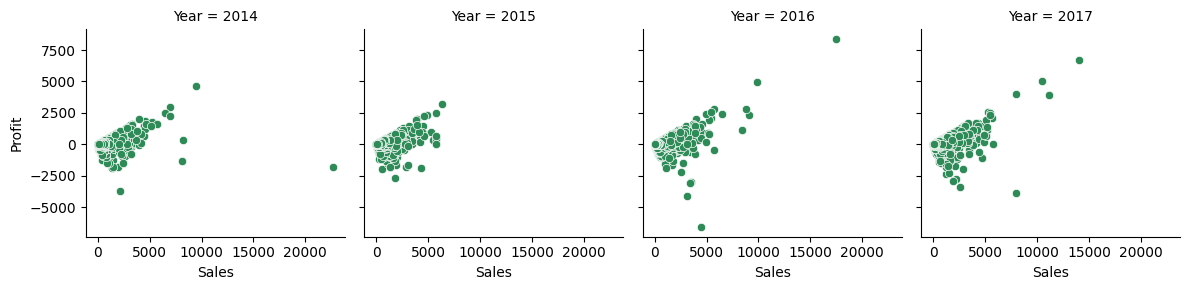

In [81]:
bieudo2 = sns.FacetGrid(df, col='Year', 
                        height=3, aspect=1)
bieudo2.map(sns.scatterplot, 'Sales', 'Profit', color='seagreen')
plt.tight_layout()

## What is the most common category?

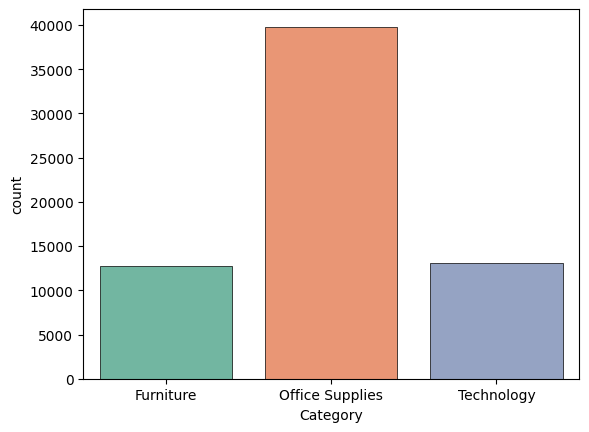

In [82]:
sns.countplot(x=df["Category"],edgecolor="k",linewidth=0.5,palette="Set2")
plt.show()

### Which segment ordered the most?

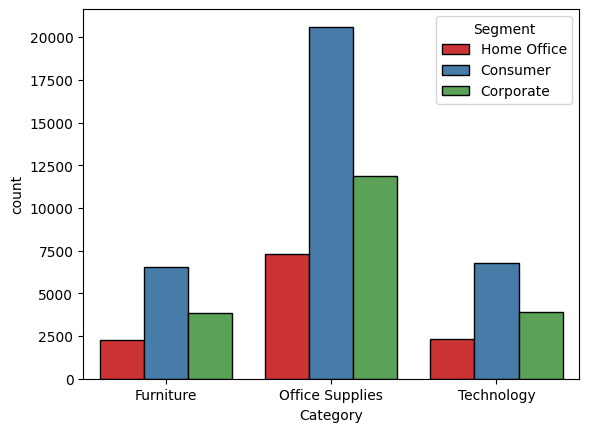

In [83]:
ax2=sns.countplot(x=df["Category"], hue=df["Segment"],palette="Set1",edgecolor="k")
# for in container 
for container in ax.containers:
    ax.bar_label(container, label_type='center',color="seashell",fontweight="bold",fontsize=8)
plt.show()

### Comparing Total order, Total sales, Total profit  by category

<Axes: xlabel='Category'>

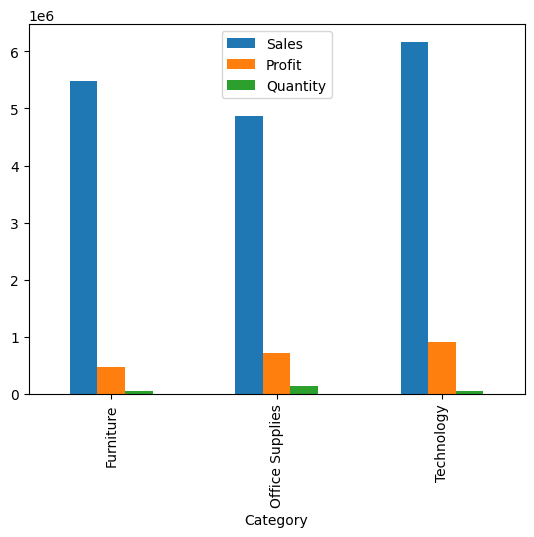

In [84]:
Sales_profit_Quantity=df[["Category","Sales","Profit","Quantity"]].groupby("Category").sum().reset_index()
Sales_profit_Quantity.plot.bar(x="Category",y=["Sales","Profit","Quantity"])

### Correlative between Discount, Quantity & Sales by Category

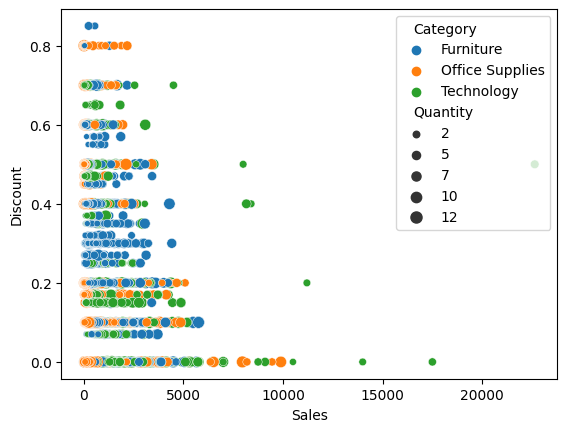

In [86]:
sns.scatterplot(data=df, 
                y='Discount', x='Sales',hue="Category",size="Quantity")
plt.show()

## Sales, Profit by Country : Tree Map

In [87]:
list_name = ['Sales', 'Profit']
list_1 = ['#FF6600','#FF7300','#FF8000','#FF8C00','#FF9900','#FFA600','#FFB300','#FFBF00','#FFDA1F','#FFCC00']
df_Country = df.groupby(["Country"]).sum().reset_index()
@widgets.interact(values=list_name)
def sales_profit_country(values='Sales'):
    fig = px.treemap(df_Country, path=['Country'], values=values, color='Country',color_discrete_sequence = list_1,
                     maxdepth=2
                    )
    fig.update_traces(textinfo = "label+value",
                      textposition='middle center',
                      textfont_size=14,
                      hovertemplate ="%{label} <br>%{value}"
                     )
#     fig.update_layout(margin = dict(t=50, l=25, r=25, b=25))
    fig.update_layout(title=f"{values} by Country",
                      title_font_color='orange',
                      title_font_size=20,
                      title_font_family="Times New Roman",
                     )
    fig.show()

interactive(children=(Dropdown(description='values', options=('Sales', 'Profit'), value='Sales'), Output()), _…